In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import xesmf as xe
import cordex as cx
import cf_xarray as cfxr
import seaborn as sns
from format_data_tools import decode_time_pop


/work/ch0636/g300047/.conda/envs/xesmf_env/lib/python3.10/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


Text(0.5, 1.0, '1861-2100')

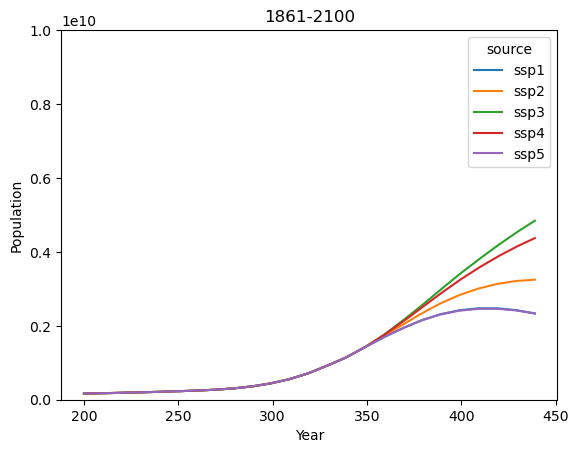

In [3]:
# Test hier plooten wir quasi die Bevölkerunsentwicklung, ssp1 // ssp3

pop1 = xr.open_dataset('/work/ch0636/g300047/cicles/population/org/population_ssp1soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop2 = xr.open_dataset('/work/ch0636/g300047/cicles/population/org/population_ssp2soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop3 = xr.open_dataset('/work/ch0636/g300047/cicles/population/org/population_ssp3soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop4 = xr.open_dataset('/work/ch0636/g300047/cicles/population/org/population_ssp4soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop5 = xr.open_dataset('/work/ch0636/g300047/cicles/population/org/population_ssp5soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)

pop_regrid_sum1 = pop1['number_of_people'].sum(('rlon', 'rlat'))
pop_regrid_sum2 = pop2['number_of_people'].sum(('rlon', 'rlat'))
pop_regrid_sum3 = pop3['number_of_people'].sum(('rlon', 'rlat'))
pop_regrid_sum4 = pop4['number_of_people'].sum(('rlon', 'rlat'))
pop_regrid_sum5 = pop5['number_of_people'].sum(('rlon', 'rlat'))
import matplotlib.pyplot as plt

ax = xr.concat([pop_regrid_sum1, pop_regrid_sum2, pop_regrid_sum3, pop_regrid_sum4,pop_regrid_sum5], dim=xr.DataArray(['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'], dims="source")).plot(hue='source')
plt.gca().set_xlabel('Year')

plt.gca().set_ylabel('Population')
plt.gca().set_ylim(0, 10000000000)
plt.gca().set_title('1861-2100')

ssp1 wird von ssp5 übermalt. Ich kann nicht feststellen, dass ich irgendwo einen Datenfile überschrieben habe. Subtrahiere ich die files liegt die differenz max bei 10 im globalen Mittel, das sieht man natürlich nicht bei Millarden

In [4]:
# open files with population data
pop_dir = '/work/ch0636/g300047/cicles/population/org/'
# The population data got remapped to arf22 grid in a separate script
pop_ssp1 = xr.open_dataset(pop_dir+'/population_ssp1soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop_ssp2 = xr.open_dataset(pop_dir+'/population_ssp2soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop_ssp3 = xr.open_dataset(pop_dir+'/population_ssp3soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop_ssp4 = xr.open_dataset(pop_dir+'/population_ssp4soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)
pop_ssp5 = xr.open_dataset(pop_dir+'/population_ssp5soc_2.5min_annual_1861-2100_africa22.nc4',decode_times=False)

#time axis needs to be defined for the population data
pop_ssp1 = decode_time_pop(pop_ssp1)
pop_ssp2 = decode_time_pop(pop_ssp2)
pop_ssp3 = decode_time_pop(pop_ssp3)
pop_ssp4 = decode_time_pop(pop_ssp4)
pop_ssp5 = decode_time_pop(pop_ssp5)
pop_ssp1.time

<xarray.DataArray 'time' (time: 240)> Size: 2kB
array([cftime.DatetimeProlepticGregorian(1861, 1, 3, 11, 46, 56, 129032, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1862, 1, 3, 17, 46, 56, 129032, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1863, 1, 3, 23, 46, 56, 129032, has_year_zero=True),
       ...,
       cftime.DatetimeProlepticGregorian(2098, 1, 4, 17, 46, 56, 129033, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(2099, 1, 4, 23, 46, 56, 129033, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(2100, 1, 5, 5, 46, 56, 129033, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2kB 1861-01-03 11:46:56.129032 ... 2100-01-05 05:4...

In [5]:
def sel_time_mean(ds, start, end):
    return ds.sel(time=slice(start, end)).mean(dim="time")

In [6]:
# Calculate mean population
# for two time slices 1991-2024 and  2031-2060 Bulletin

pop_1991_2024_ssp1 = sel_time_mean(pop_ssp1, "1991-01-01", "2024-12-31")
pop_2031_2060_ssp1 = sel_time_mean(pop_ssp1, "2031-01-01", "2060-12-31")
pop_1991_2024_ssp2 = sel_time_mean(pop_ssp2, "1991-01-01", "2024-12-31")
pop_2031_2060_ssp2 = sel_time_mean(pop_ssp2, "2031-01-01", "2060-12-31")
pop_1991_2024_ssp3 = sel_time_mean(pop_ssp3, "1991-01-01", "2024-12-31")
pop_2031_2060_ssp3 = sel_time_mean(pop_ssp3, "2031-01-01", "2060-12-31")
pop_1991_2024_ssp4 = sel_time_mean(pop_ssp4, "1991-01-01", "2024-12-31")
pop_2031_2060_ssp4 = sel_time_mean(pop_ssp4, "2031-01-01", "2060-12-31")
pop_1991_2024_ssp5 = sel_time_mean(pop_ssp5, "1991-01-01", "2024-12-31")
pop_2031_2060_ssp5 = sel_time_mean(pop_ssp5, "2031-01-01", "2060-12-31")


In [7]:
def country_sum(ds,col_name='sce_ssp'):
    """
    Calculate the sum of population for each country in the DataFrame.
    """
    import geopandas as gpd
    from rasterio.features import geometry_mask
    import pandas as pd

    # 1. Load data
    data = ds['number_of_people'].rio.write_crs("EPSG:4326")

    # 2. Load world shapefile
    shpfile = ('/home/g/g300047/GITLAB/climate_fact_data/climate_fact_data/data/shp/globfile_selected.shp')
    globfile = gpd.read_file(shpfile)

    # Only process regions in Africa
    africa_gdf = globfile[globfile['CONTINENT'] == 'Africa']
    for region_name in africa_gdf['region'].unique():
        region_gdf = africa_gdf[africa_gdf['region'] == region_name]
        mask = geometry_mask(
            [geom for geom in region_gdf.geometry],
             transform=data.rio.transform(),
            invert=True,
            out_shape=data.rio.shape
        )
        masked = data.where(mask)
        region_sum = masked.sum(dim=["rlat", "rlon"], skipna=True)
        #print(f"Sum over {region_name}: {region_sum.values}")
        # just test:
        #if region_name == 'Burkina Faso':
        #   print(f"EXTRA:Sum over Burkina Faso: {region_sum.values}")
        # if you like to do a check
        # 4. Apply mask
        #masked = data.where(mask)
    #masked.plot()

    # Create or append to a DataFrame to collect results
        if 'pop_results' not in locals():
            pop_results = pd.DataFrame(columns=['region', col_name])

        pop_results = pd.concat([
            pop_results,
            pd.DataFrame([{
                'region': region_name,
                col_name: float(region_sum.values)
            }])
            ], ignore_index=True)
    
    return pop_results


# Wikipedia 23 Millionen in 2023
# 16149871.286037782 ssp3
# 43060954.047317535


In [ ]:
# Define the datasets and their corresponding column names
pop_datasets = [
    (pop_1991_2024_ssp1, 'ssp1_1991-2024'),
    (pop_1991_2024_ssp2, 'ssp2_1991-2024'),
    (pop_1991_2024_ssp3, 'ssp3_1991-2024'),
    (pop_1991_2024_ssp4, 'ssp4_1991-2024'),
    (pop_1991_2024_ssp5, 'ssp5_1991-2024'),
    (pop_2031_2060_ssp1, 'ssp1_2031-2060'),
    (pop_2031_2060_ssp2, 'ssp2_2031-2060'),
    (pop_2031_2060_ssp3, 'ssp3_2031-2060'),
    (pop_2031_2060_ssp4, 'ssp4_2031-2060'),
    (pop_2031_2060_ssp5, 'ssp5_2031-2060'),
]

# Initialize final_pop_results as None
final_pop_results = None

# Loop over all datasets and collect results
for pop, col_name in pop_datasets:
    print(f"Processing {col_name}")
    pop_results = country_sum(pop, col_name=col_name)
    if final_pop_results is None:
        final_pop_results = pop_results
    else:
        
        final_pop_results = final_pop_results.merge(pop_results, on='region', how='outer')

# 5. Save results to CSV if needed
final_pop_results.to_csv('/work/ch0636/g300047/cicles/population/population_ssp_all_bulletin_africa22.csv', index=False)


Processing ssp1_1991-2024


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


Processing ssp2_1991-2024


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp3_1991-2024


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp4_1991-2024


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp5_1991-2024


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp1_2031-2060


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp2_2031-2060


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp3_2031-2060


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp4_2031-2060


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier
Processing ssp5_2031-2060


/tmp/ipykernel_1389237/1150018643.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pop_results = pd.concat([


hier


In [10]:
final_pop_results[['region', 'ssp1_1991-2024', 'ssp2_1991-2024', 'ssp3_1991-2024', 'ssp4_1991-2024', 'ssp5_1991-2024',
                   'ssp1_2031-2060', 'ssp2_2031-2060', 'ssp3_2031-2060', 'ssp4_2031-2060', 'ssp5_2031-2060']].head(10)

,region,ssp1_1991-2024,ssp2_1991-2024,ssp3_1991-2024,ssp4_1991-2024,ssp5_1991-2024,ssp1_2031-2060,ssp2_2031-2060,ssp3_2031-2060,ssp4_2031-2060,ssp5_2031-2060
0,Algeria,3.250276e+07,3.269026e+07,3.293713e+07,3.255971e+07,3.247437e+07,4.217913e+07,4.550829e+07,5.107701e+07,4.260746e+07,4.164249e+07
1,Angola,1.746613e+07,1.769046e+07,1.779774e+07,1.782703e+07,1.748626e+07,3.554030e+07,4.034217e+07,4.496221e+07,4.535358e+07,3.587382e+07
2,Benin,7.330187e+06,7.424918e+06,7.488046e+06,7.462065e+06,7.341062e+06,1.390661e+07,1.572089e+07,1.729521e+07,1.689201e+07,1.408147e+07
3,Bir Tawil,1.247061e+03,1.271364e+03,1.292232e+03,1.281619e+03,1.250733e+03,3.195870e+03,3.681777e+03,4.224856e+03,4.052866e+03,3.224638e+03
4,Botswana,1.858457e+06,1.865497e+06,1.850412e+06,1.846486e+06,1.862397e+06,2.389161e+06,2.530262e+06,2.321264e+06,2.144608e+06,2.486384e+06
5,Burkina Faso,1.567499e+07,1.591328e+07,1.614987e+07,1.611942e+07,1.563994e+07,3.076987e+07,3.596529e+07,4.306095e+07,4.207407e+07,2.973012e+07
6,Burundi,7.703339e+06,7.756036e+06,7.741993e+06,7.798468e+06,7.756753e+06,1.395729e+07,1.498603e+07,1.502191e+07,1.606928e+07,1.491039e+07
7,Cabo Verde,1.264331e+05,1.274855e+05,1.296302e+05,1.268599e+05,1.252018e+05,1.559916e+05,1.743928e+05,2.208670e+05,1.603420e+05,1.329840e+05
8,Cameroon,1.865025e+07,1.881104e+07,1.898813e+07,1.899159e+07,1.864523e+07,2.972711e+07,3.230241e+07,3.604196e+07,3.601674e+07,2.959986e+07
9,Central African Republic,3.803149e+06,3.844643e+06,3.872971e+06,3.865205e+06,3.804838e+06,5.884808e+06,6.573531e+06,7.197805e+06,7.072942e+06,5.901270e+06


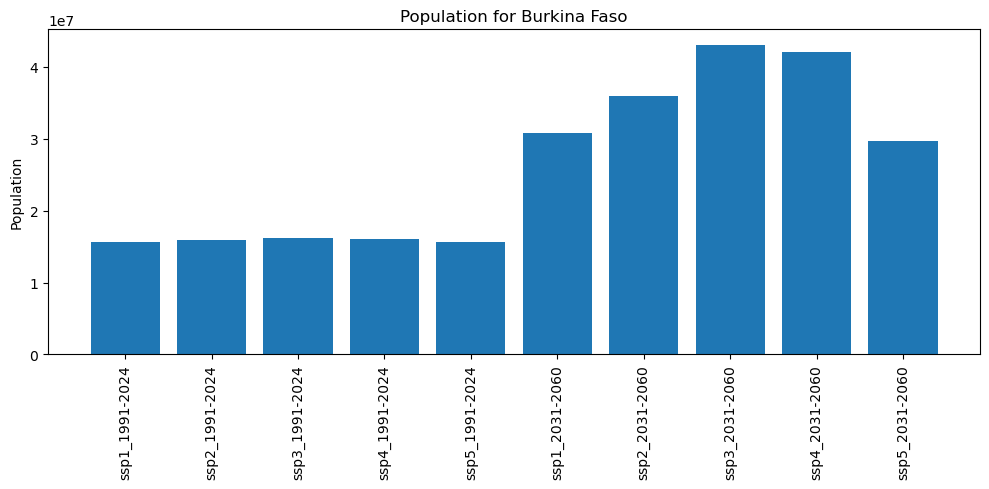

In [12]:
import matplotlib.pyplot as plt

# Filter for 'Burkina Faso' (note the leading space in your region name)
region_name = ' Burkina Faso' if ' Burkina Faso' in pop_results['region'].values else 'Burkina Faso'
burkina_row = final_pop_results[final_pop_results['region'] == region_name]

# Extract SSP columns for both periods
ssp_cols = [
    'ssp1_1991-2024', 'ssp2_1991-2024', 'ssp3_1991-2024', 'ssp4_1991-2024', 'ssp5_1991-2024',
    'ssp1_2031-2060', 'ssp2_2031-2060', 'ssp3_2031-2060', 'ssp4_2031-2060', 'ssp5_2031-2060'
]
values = burkina_row[ssp_cols].values.flatten()
labels = ssp_cols

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.ylabel('Population')
plt.title(f'Population for {region_name}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()